# Introduction to HDF5

The Neurodata Without Borders (NWB) files you have been using for previous data sets and will be using for the CAM data set are actually HDF5 files.  HDF5 is a file format designed for handling large data sets.

Since the raw data for CAM is given to you in this format, here is a brief introduction to extracting data from these files and creating and writing to your own HDF5 data files.


##h5py

The Python interface to HDF5 is given in the h5py module.

In [1]:
import h5py

#some other things we'll use
import os
%matplotlib inline

In [2]:
# Assuming you have one of the Summer Workshop on the Dynamic Brain disks, the data will be in these directories

# on OS X use
cam_dir = '/Volumes/Brain2015/CAM/'
cam_dir = '/Volumes/Install OS X Mavericks/'

# on Windows use
#cam_dir =

# on Linux use
#cam_dir = 

# pick an experiment number
expt = str(482591434)

# The uncorrected raw data (for those experiments that have it) is labeled by expt_compressed.h5
raw_data_path = os.path.join(cam_dir,expt,expt+'_compressed.h5')

# The motion corrected data is labeled 'concat_31Hz_0_compressed.h5'
motion_corrected_data_path = os.path.join(cam_dir,expt,'concat_31Hz_0_compressed.h5')

# Creating h5py objects

You access data in HDF5 files via a File object, created as

In [3]:
motion_corrected_data = h5py.File(motion_corrected_data_path,'r')

'r' here refers to the access mode (for read), you can also open files with modes 

r+ :  read and write

w  :  write and create a new file (This will erase a previous file!)

w- or x :  write and fail if the file exists

a  :  'append', read/write if the file exists, create otherwise

# h5py uses a dictionary interface

In [24]:
motion_corrected_data.keys()

[u'data']

In [25]:
motion_corrected_data['data']

<HDF5 dataset "data": shape (57307, 512, 512), type "<u2">

Various useful parameters of datasets

In [47]:
print  "Shape for 'data' is ",motion_corrected_data['data'].shape
print  "dtype for 'data' is ",motion_corrected_data['data'].dtype
print  "Compression type is ",motion_corrected_data['data'].compression
print  "compression_opts value is ",motion_corrected_data['data'].compression_opts

Shape for 'data' is  (57307, 512, 512)
dtype for 'data' is  uint16
Compression type is  gzip
compression_opts value is  9


You can slice just like numpy arrays

In [2]:
print motion_corrected_data['data'][0,0:10,0:10]

NameError: name 'motion_corrected_data' is not defined

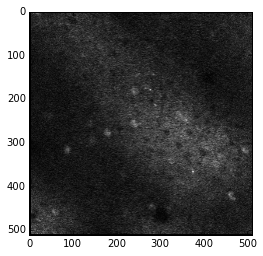

In [30]:
plt.imshow(motion_corrected_data['data'][0],cmap='gray')

# Grabbing a region

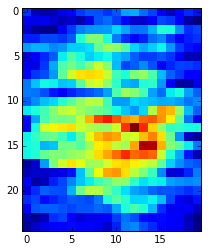

In [8]:
plt.imshow(motion_corrected_data['data'][0,265:290,170:190],interpolation='nearest')

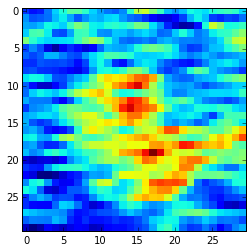

In [14]:
plt.imshow(motion_corrected_data['data'][0,240:270,225:255],interpolation='nearest')

Time trace of a single pixel

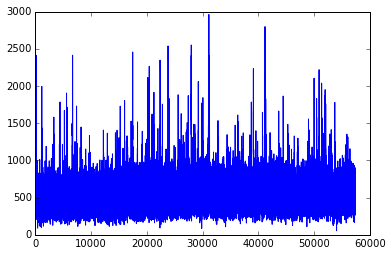

In [37]:
plt.plot(motion_corrected_data['data'][:,280,183])

Use slicing to compute traces for regions

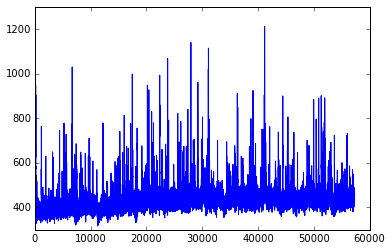

In [4]:
trace = motion_corrected_data['data'][:,265:290,170:190].mean(axis=(1,2))

plt.plot(trace)

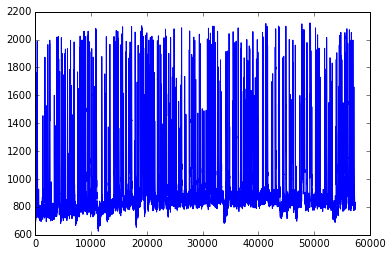

In [5]:
another_trace = motion_corrected_data['data'][:,240:270,225:255].mean(axis=(1,2))

plt.plot(another_trace)

# Creating new HDF5 files

Use 'create_dataset' to add datasets to a file

In [6]:
#create a new h5py object in write mode 'w'  
#THIS WILL DELETE ANY PREVIOUS FILE!!!
new_data_path = os.path.join(cam_dir,'new_data.h5')
new_data = h5py.File(new_data_path,'w')    

new_data.create_dataset('trace',shape=trace.shape,dtype=trace.dtype)
new_data['trace'][...]=trace

#don't forget to close the file
new_data.close()

In [7]:
#create a new h5py object in append mode 'a'
new_data_path = os.path.join(cam_dir,'new_data.h5')
new_data = h5py.File(new_data_path,'a')    

new_data.create_dataset('another_trace',data=another_trace)   #shape=trace.shape,dtype=trace.dtype)
new_data['another_trace'][...]= another_trace - np.mean(another_trace)

new_data['trace'][:] = new_data['trace'].value - np.mean(new_data['trace'].value)

#don't forget to close the file
new_data.close()

Access our file and verify the contents

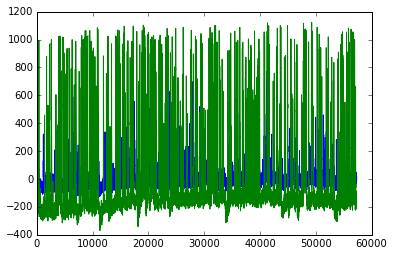

In [8]:
my_data = h5py.File(new_data_path,'r')

plt.plot(my_data['trace'])
plt.plot(my_data['another_trace'])

my_data.close()